# Instruction
- Exam time from 0900 to 1200
- Submit your notebook in AIT TEAL in `Midterm Submission`
- The exam is openbook/open web.
- You are not allowed to use any GenAI tools.



---



# Question 1 : Linear Shift Invariance System `(10 points)`
Please explain properties of LSIS

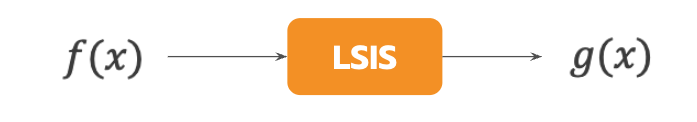


**Linear Shift Invariance System (LSIS)** is a system with two properties:
1. Linearity - $f(ax + by) = af(x) + bf(y)$ so it obeys the linear superposition.
2. Shift invariance - if we shift the input in time (or shift the input in a vector) then the output is also shifted in that amount. Mathematically, we say that if $f(x(t)) = y(t)$, shift invariance means that $f(x(t + \tau)) = y(t + \tau)$

These two properties are independent.

For example, ideal lens is an LSIS system because if we assume that defocused image $(g)$ and proceed version of focused image $(f)$, it has:
1. Linearity - brightness variation
2. Shift invariance - Scene movement

Another example of LSIS system is convolution. If we let:
$$g_1(x) = \int_{-\infty}^{\infty} f_1(\tau) h(x - \tau) d\tau$$ and $$g_2(x) = \int_{-\infty}^{\infty} f_2(\tau) h(x - \tau) d\tau$$

Then, to prove Linearity property:
$$\int_{-\infty}^{\infty} (\alpha f_1(\tau) + \beta f_2(\tau)) h(x - \tau) d\tau = $$
$$ = \alpha \int_{-\infty}^{\infty} f_1(\tau) h(x - \tau) d\tau$ + \beta \int_{-\infty}^{\infty} f_2(\tau) h(x - \tau) d\tau = $$
$$ = \alpha g_1(x) + \beta g_2(x)$$

And samely, shift invariance property. If we let:
$$g(x) = \int_{-\infty}^{\infty} f(\tau) h(x - \tau) d\tau$$
Then,
$$\int_{-\infty}^{\infty} f(\tau - a)h(x - \tau)d\tau = $$
$$= \int_{-\infty}^{\infty} f(\mu) h(x - a - \mu)d\mu = $$
$$ = g(x - a)$$

# Question 2 : Bilateral Filter

## Q 2.1 : Write a python code to apply the following filters to a given image, `(5 points)`
- Gaussian filter with `kernel size = 9` and `sigmaX = sigmaY = 50`
- Bilateral filter with `kernel size = 9` and  `spatial and color sigma = 90`
- Show the result images side-by-side

Input image is in `assets/q2`.

Analyze the differences in the results. Explain why the bilateral filter is better at preserving edges.

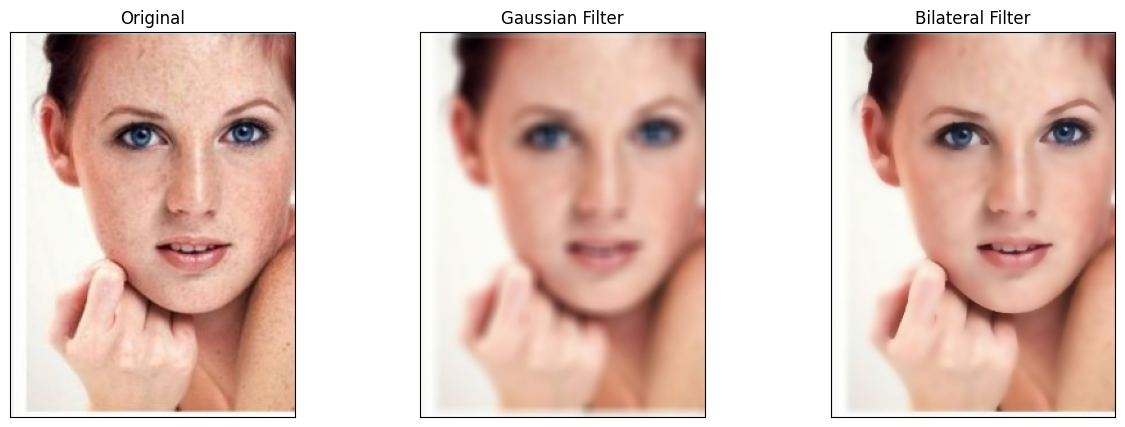

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

img = cv2.imread('face-image.jpg')

kernel_size = 9

gaussian = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigmaX=50, sigmaY=50)
bilateral = cv2.bilateralFilter(img, kernel_size, sigmaColor=90, sigmaSpace=90)

titles = ['Original', 'Gaussian Filter', 'Bilateral Filter']
images = [img, gaussian, bilateral]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

**Analyze the differences in the results. Explain why the bilateral filter is better at preserving edges.**

On the left, we have original image. In the middle, Gaussian Filter with kernel_size=9 and sigmaX = sigmaY = 50. And samely, on the right, Bilateral filter.

Gaussian Filter corresponds to isotrophic diffusion. Its application to an image will blur it uniformly, whatever the image content, edges, etc.

The bilateral filter is almost like a Gaussian filter, except that the Gaussian is modulated by a function that computes the similarity between the central pixel (where the filter is applied) and a pixel in its neighborhood (that is used in blurring).

So, Gaussian filtering in uniform areas of the image, no filtering across object borders. The bilateral filter will produce a more pleasant results, because it will avoid the introduction of blur between objects while still removing noise in uniform areas.

- `cv.bilateralFilter()` is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. The Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average, and Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity and the pixel is an edge pixel or not. Therefore, the Gaussian Filter blurs the edges also.

- Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

## Q 2.2 : Write a python code to apply a bilateral filter with the following spatial and color (Brightness) sigma values and show the results `(15 points)`

Spatial Sigma | Color Sigma

<table>
<tr>
    <th>Spatial Sigma</th>
    <th>Color Sigma</th>
</tr>

<tr>
    <td>9</td>
    <td>9</td>
</tr>

<tr>
    <td>9</td>
    <td>75</td>   
</tr>

<tr>
    <td>9</td>
    <td>500</td>   
</tr>

<tr>
    <td>75</td>
    <td>9</td>   
</tr>

<tr>
    <td>500</td>
    <td>9</td>   
</tr>
</table>

Note that `d=9` for all sigma.

Explain how the choice of sigma values affects the filtering results

In [ ]:
# Your code here


# Question 3 : SIFT and Image Alignment


Using `SIFT`detector, detect `feature points` and calculate `descriptors`. Then `match` correnspondences between two given images in `assets/q3`.


## Q 3.1 : Draw keypoints for each image. `(5 points)`

In [ ]:
# Your code here


## Q 3.2 : Draw the matched keypoints `(5 points)`

In [ ]:
# Your code here

## Q 3.3 : Plot the `most` similar keypoint pair using their `descriptors` `(5 points)`

In [ ]:
# Plot the `most` similar keypoint pair using their `descriptors`


## Q 3.4 : Change a parameter of SIFT_create() function to increase the number of images in a scale-space to =`5`, and find `keypoints` and `descriptors` in `book_scene.jpeg` only. Analyze how the result (keypoints) changes in response to this parameter change. `(5 points)`

In [ ]:
# Your code here

# Question 4 : Canny Edge Detection `(25 points)`

Complete a self defined Class for Canny Edge Detection by implementing
- Non-maximum suppression
- Double Thresholding
- Use an image in `assets/q4` as an input


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

class CannyEdgeDetector:
    def __init__(self, img):
        self.img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        self.gaussian_blur = None
        self.gradient_magnitude = None
        self.suppressed = None
        self.thresholded = None

    def apply_gaussian_blur(self, kernel_size=5):
        self.gaussian_blur = cv.GaussianBlur(self.img, (kernel_size, kernel_size), 1.4)
        return self.gaussian_blur

    def compute_gradient(self):
        gx = cv.Sobel(self.gaussian_blur, cv.CV_64F, 1, 0, ksize=3)
        gy = cv.Sobel(self.gaussian_blur, cv.CV_64F, 0, 1, ksize=3)
        self.magnitude = np.sqrt(gx**2 + gy**2)
        self.direction = np.arctan2(gy, gx)
        return self.magnitude, self.direction

    def non_maximum_suppression(self):
        rows, cols = self.magnitude.shape
        self.suppressed = np.zeros((rows, cols), dtype=np.int32)
        angle = self.direction * 180 / np.pi # Convert angle to radian
        angle[angle < 0] += 180
        for i in range(1, rows-1):
            for j in range(1, cols-1):
              q = 255
              r = 255

             #----------------
             # Your code here
             #----------------

        return self.suppressed


    def threshold(self, lowThresholdRatio=0.05, highThresholdRatio=0.09):
        rows, cols = self.suppressed.shape
        self.thresholded = np.zeros((rows,cols), dtype=np.int32)

        highThreshold = self.suppressed.max() * highThresholdRatio;
        lowThreshold = highThreshold * lowThresholdRatio;

        weak = np.int32(25)
        strong = np.int32(255)

        #----------------
        # Your code here
        #----------------

        self.thresholded[strong_i, strong_j] = strong
        self.thresholded[weak_i, weak_j] = weak

        return self.thresholded


    def hysteresis(self, weak=25, strong=255):
        rows, cols = self.thresholded.shape
        for i in range(1, rows-1):
            for j in range(1, cols-1):
                if (self.thresholded[i, j] == weak):
                    if (
                        (self.thresholded[i+1, j-1] == strong) or (self.thresholded[i+1, j] == strong) or
                        (self.thresholded[i+1, j+1] == strong) or (self.thresholded[i, j-1] == strong) or
                        (self.thresholded[i, j+1] == strong) or (self.thresholded[i-1, j-1] == strong) or
                        (self.thresholded[i-1, j] == strong) or (self.thresholded[i-1, j+1] == strong)
                    ):
                        self.thresholded[i, j] = strong
                    else:
                        self.thresholded[i, j] = 0
        return self.thresholded


# Example usage with intermediate steps plotted
img = cv.imread('path_to_image.jpg')
# ---------------------
# Your code here
# ---------------------


In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title('Original Image')
ax[0,0].axis("off")
ax[0,1].imshow(gs, cmap='gray')
ax[0,1].set_title('Gaussian Blur')
ax[0,1].axis("off")
ax[0,2].imshow(gm, cmap='gray')
ax[0,2].set_title('Gradient Magnitude')
ax[0,2].axis("off")
ax[1,0].imshow(nms, cmap='gray')
ax[1,0].set_title('NMS')
ax[1,0].axis("off")
ax[1,1].imshow(th, cmap='gray')
ax[1,1].set_title('Threshold')
ax[1,1].axis("off")
ax[1,2].imshow(hy, cmap='gray')
ax[1,2].set_title('Hysteresis')
ax[1,2].axis("off")
plt.show()

# Question 5 :

## Q 5.1 : Implement a basic CNN in PyTorch for classifying images in the `CIFAR10` dataset. Your CNN should have `(20 points)`
- `2` convolutional layers with `11x11`, and `5x5` kernel sizes respectively
- `2` max-pooling layers with size of `3x3`
- `2` fully connected layers with size of `1024` and `10`
- Model architecture: `Input -> Conv -> Pool -> Conv -> Pool -> FC -> FC`

Train your model with the following hyperparameters
- Subsample dataset: `1,000` samples
- resize images to the size of : `224x224`
- Split data into `3 datasets`: Train, Val, and Test (you can choose yourself a number of samples in each set)
- Batch_size: `64`
- Epoch: `15`
- learning_rate: `0.001`
- Optimizer: your choice


Report the following
- accuracy and loss on Training and Validation dataset
- accuracy on the test set.
- number of learnable parameters

In [ ]:
# For our puffer surver we need to browse via a proxy!!
import os
# Set HTTP and HTTPS proxy
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

In [ ]:
# Your code here

In [ ]:
transform = transforms.Compose([
    # Your code here
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Download CIFAR-10 dataset (or use your own dataset)
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

In [ ]:
# Your code here

In [ ]:
# Load the data
train_loader = torch.utils.data.DataLoader(Your code here)
# Your code here

In [ ]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

def train():
    cnn_model.train()
    train_corr, train_total, train_running_loss = 0, 0, 0  # counters for tracting trainning accuracy, total examples, running loss

    for step, (data, y) in enumerate(train_loader):        # loops over batch of data in train_loader
        data, y = data.to(device), y.to(device)

        # --------------------------
        # Your code here
        # --------------------------

        y_pred = torch.argmax(logits, 1)                     # selects the predicted class (the index with the highest value)
        train_corr += torch.sum(torch.eq(y_pred, y).float()).item()      # counts correct predictions
        train_total += len(data)                             # tracks total no. of samples
        train_running_loss += loss.item()                    # accumulates loss

    # Calculate average loss and accuracy for this epoch
    epoch_loss = train_running_loss / len(train_loader)
    epoch_accuracy = train_corr / train_total

    # Append to lists for plotting
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}] Train Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

In [ ]:
def test():
    # Your code here !!! sets model to evalutaion mode
    test_corr, test_total, test_running_loss = 0, 0, 0
    with torch.no_grad():
        for step, (data, y) in enumerate(test_loader):
            data, y = data.to(device), y.to(device)
            _, logits = cnn_model(data)
            loss = loss_fn(logits, y)
            y_pred = torch.argmax(logits, 1)
            test_corr += torch.sum(torch.eq(y_pred, y).float()).item()
            test_total += len(data)
            test_running_loss += loss.item()
    # Calculate average loss and accuracy for this epoch
    epoch_loss = test_running_loss / len(test_loader)
    epoch_accuracy = test_corr / test_total

    # Append to lists for plotting
    test_losses.append(epoch_loss)
    test_accuracies.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}] Test Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

In [ ]:
for epoch in range(num_epoch):
  # ----------
  # Your code here
  # ----------

# Test a model
test()

## Q 5.2 : Define the new model architecture that have `(15 points)`
- `3` convolutional layers with `3x3`kernel sizes
- `2` max-pooling layers with size of `3x3`
- `2` fully connected layers with size of `1024` and `10`
- Model architecture: `Input -> Conv -> Conv -> Pool -> Conv -> Pool -> FC -> FC`

Train the new model with the same hyperparameters as above

Report the following
- accuracy and loss on Training and Validation dataset
- accuracy on the test set.
- number of learnable parameters

## Q 5.3 : Compare the performance of these models. Analyze the strengths and weaknesses of each model. `(10 points)`

`Your Answer here !!!`